In [57]:
from haloflow.data import hf2_centrals

import numpy as np
import matplotlib.pyplot as plt

from functools import partial
from scipy.optimize import minimize

In [58]:
Y_all, _ = hf2_centrals('all', 'mags', 'Simba100')
mh = Y_all[:,1].copy()
mh = mh[mh>=12]

In [59]:
p_hmf, mh_bin = np.histogram(mh, bins=30) 
lo, hi = mh_bin[0], mh_bin[-1]

In [60]:
p_hmf, mh_bin

(array([768, 671, 480, 399, 327, 227, 187, 144, 143, 111,  85,  74,  44,
         35,  29,  23,  20,  10,  10,  11,  10,   7,   1,   0,   2,   1,
          2,   1,   0,   1]),
 array([12.     , 12.09948, 12.19896, 12.29844, 12.39792, 12.4974 ,
        12.59688, 12.69636, 12.79584, 12.89532, 12.9948 , 13.09428,
        13.19376, 13.29324, 13.39272, 13.4922 , 13.59168, 13.69116,
        13.79064, 13.89012, 13.9896 , 14.08908, 14.18856, 14.28804,
        14.38752, 14.487  , 14.58648, 14.68596, 14.78544, 14.88492,
        14.9844 ]))

In [61]:
from haloflow.schechter import nll_counts

nll = partial(nll_counts, p_hmf=p_hmf, mh_bin=mh_bin, lo=lo, hi=hi, type='single_schechter')

# init (in log-space for stability)
p0 = [np.log(0.6*p_hmf.sum()+1e-6), np.median(mh), -1.0]

bounds = [(-50, 50), (lo, hi), (-5, 2)]
res = minimize(nll, p0, bounds=bounds)
phi1_fit, logMstar_fit, a1_fit = res.x
print(f"Single Schechter fit: logMstar={logMstar_fit:.3f}, alpha={a1_fit:.3f}, phi*={phi1_fit:.3e}")


Single Schechter fit: logMstar=14.809, alpha=-2.000, phi*=6.006e+00


In [62]:
nll_double_counts = partial(nll_counts, p_hmf=p_hmf, mh_bin=mh_bin, lo=lo, hi=hi, type='double_schechter')
# phi1, logMstar, a1, phi2, a2

# init (in log-space for stability) 
p0 = [
    np.log(0.5*p_hmf.sum()+1e-6), np.median(mh), 
    -1.0, np.log(0.5*p_hmf.sum()+1e-6), -1.5
]

bounds = [(-50, 50), (lo, hi), (-5, 2), (-50, 50), (-5, 2)]
resD = minimize(nll_double_counts, p0, bounds=bounds)

phi1_fitD, logMstar_fitD, a1_fitD, phi2_fitD, a2_fitD = resD.x
print(f"Double Schechter fit: logMstar={logMstar_fitD:.3f}, alpha1={a1_fitD:.3f}, phi1*={phi1_fitD:.3e}, alpha2={a2_fitD:.3f}, phi2*={phi2_fitD:.3e}")

Double Schechter fit: logMstar=14.574, alpha1=-1.997, phi1*=1.053e+01, alpha2=0.228, phi2*=1.027e+01


[7.89610064e+02 6.27720856e+02 4.98965264e+02 3.96561935e+02
 3.15117933e+02 2.50343082e+02 1.98826028e+02 1.57853441e+02
 1.25267089e+02 9.93509385e+01 7.87398860e+01 6.23483009e+01
 4.93129935e+01 3.89472937e+01 3.07052580e+01 2.41527974e+01
 1.89447215e+01 1.48066999e+01 1.15206949e+01 8.91348002e+00
 6.84754477e+00 5.21373328e+00 3.92548686e+00 2.91420170e+00
 2.12547344e+00 1.51610743e+00 1.05164111e+00 7.04306161e-01
 4.51354812e-01 2.73688425e-01]
[7.89610064e+02 7.89610064e+02 7.89610064e+02 7.89610064e+02
 7.89610064e+02 7.89610064e+02 7.89610064e+02 7.89610064e+02
 7.89610064e+02 7.89610064e+02 7.89610064e+02 7.89610064e+02
 7.89610064e+02 7.89610064e+02 7.89610064e+02 7.89610064e+02
 7.89610064e+02 7.87908525e+02 7.83046988e+02 7.78185450e+02
 7.73323912e+02 7.68462374e+02 7.63600837e+02 7.58739299e+02
 7.53877761e+02 7.49016223e+02 7.44154686e+02 7.39293148e+02
 7.34431610e+02 7.29570072e+02 7.24708535e+02 7.19846997e+02
 7.14985459e+02 7.10123921e+02 7.05262383e+02 7.00400

<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
/var/folders/4v/k4xpjdyx3f1_c95lc_dlyhkr0000gq/T/ipykernel_92352/3535833071.py:28: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\log M_*$')


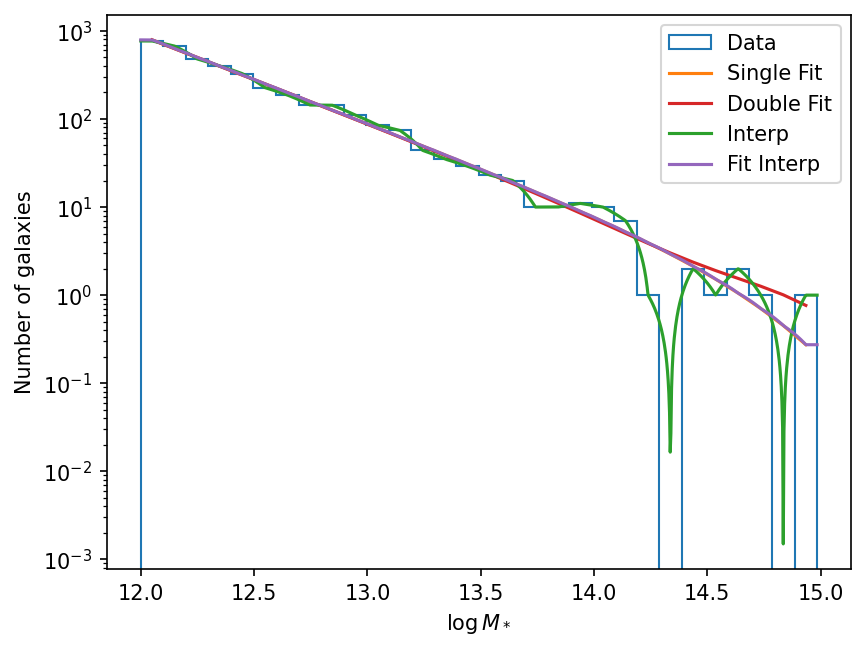

In [63]:
fig, ax = plt.subplots(dpi=150)
ax.hist(mh, bins=mh_bin, histtype='step', label='Data', color='C0')

# best curve fit
x = 0.5*(mh_bin[1:]+mh_bin[:-1])
dx = np.diff(mh_bin)
N = len(mh)

from haloflow.schechter import mu_counts

mu = mu_counts(res.x, type='single_schechter', mh_bin=mh_bin, lo=lo, hi=hi)
plt.plot(x, mu, label='Single Fit', color='C1')
print(mu)

# double schechter fit
muD = mu_counts(resD.x, type='double_schechter', mh_bin=mh_bin, lo=lo, hi=hi)
plt.plot(x, muD, label='Double Fit', color='C3')

# add interp curve
xg = np.linspace(lo, hi, 1000)
yg = np.interp(xg, x, p_hmf)
ax.plot(xg, yg, color='C2', label='Interp')

yg_fit = np.interp(xg, x, mu)
ax.plot(xg, yg_fit, color='C4', label='Fit Interp')
print(yg_fit)

ax.set_xlabel('$\log M_*$')
ax.set_ylabel('Number of galaxies')
ax.set_yscale('log')

ax.legend()

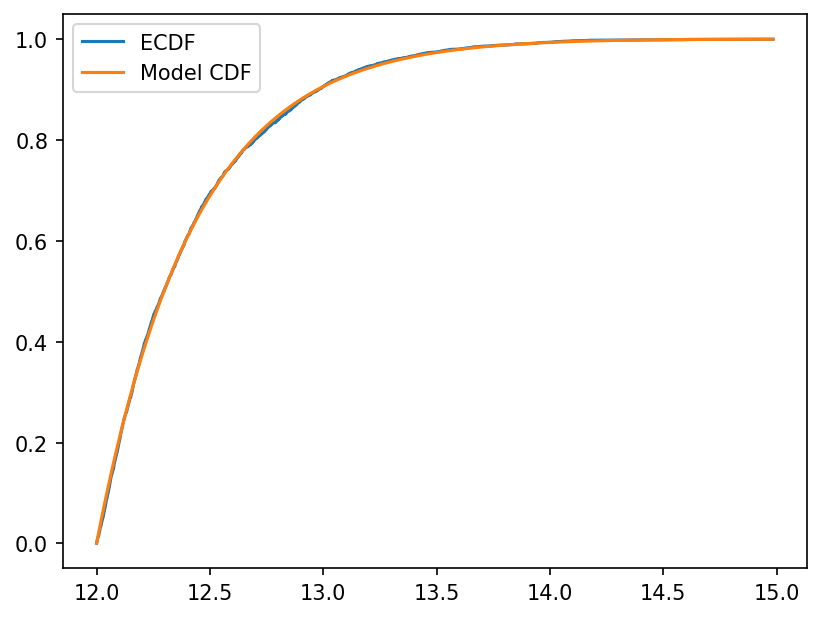

In [64]:
logM = np.sort(mh)
lo, hi = mh_bin[0], mh_bin[-1]
logM = logM[(logM>=lo)&(logM<=hi)]

# empirical CDF
ecdf = np.arange(1, len(logM)+1)/len(logM)

# model CDF via numerical integration
grid = np.linspace(lo, hi, 8000)

from haloflow.schechter import schechter_logmass
pdf = schechter_logmass(grid, log_mstar=logMstar_fit, phi_star=phi1_fit, alpha=a1_fit)
cdf = np.cumsum(pdf)
cdf /= cdf[-1]

# model CDF at data points
model_cdf_at_data = np.interp(logM, grid, cdf)
# model_cdf_at_data2 = np.interp(logM, grid, cdf2)
# model_cdf_at_data3 = np.interp(logM, grid, cdf3)

fig, ax = plt.subplots(dpi=150)

ax.plot(logM, ecdf, label='ECDF')
ax.plot(logM, model_cdf_at_data, label='Model CDF')
# ax.plot(logM, model_cdf_at_data2, label='Double Model CDF')
# ax.plot(logM, model_cdf_at_data3, label='Schechter + Sigmoid CDF')
ax.legend()

In [65]:
y = p_hmf.astype(float)
mu_safe = np.maximum(mu, 1e-12)

term = np.zeros_like(y)
m = y > 0
term[m] = y[m]*np.log(y[m]/mu_safe[m])

D = 2*np.sum(mu_safe - y + term)
dof = np.sum(y > 0) - 2   # ~bins_used - (#shape params), adjust if you fit more params
print("Deviance D =", D, "  D/dof =", D/dof)

Deviance D = 32.61904450913967   D/dof = 1.2545786349669104
